FitGpt Gym

After advanced research of the provided by the Gym data, all of the features were taken into account and these are the steps which we went through, in order to retreive the best model, based on the provided clients information.

In [46]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Exploratory Data Analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score


In [49]:
# Loading the data
fitgpt_df = pd.read_csv("calories_burned_fitgpt_gym.csv")

First of all, the general data information and data types were analysed, concluding that only two categorical features exist - Gender and Workout type.

In [4]:
print(fitgpt_df.info)
print(fitgpt_df.dtypes)
print()

print(f'Gender unique values: {np.unique(fitgpt_df['Gender'].values)}')
print(f'Workout type unique values: {np.unique(fitgpt_df['Workout_Type'].values)}')

<bound method DataFrame.info of      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_

Secondly, brief analyzation of the statistical data was made by calculating the mean, median and standard deviation of the numerical features as well as the mode of the categorical features.
Moreover, histograms were used to monitor the number of studies made, separated by type - for Gender and Workout type and by interval - for all other numerical features.

Mean value for Age : 38.683
Median value for Age : 40.0
Standard deviation for Age : 12.175


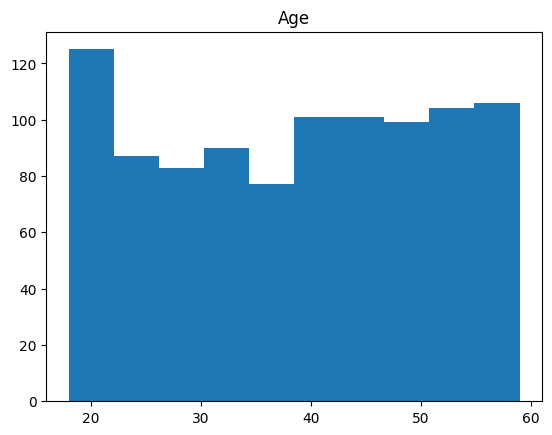


Mode value for Gender : Female

Mean value for Weight (kg) : 73.855
Median value for Weight (kg) : 70.0
Standard deviation for Weight (kg) : 21.197


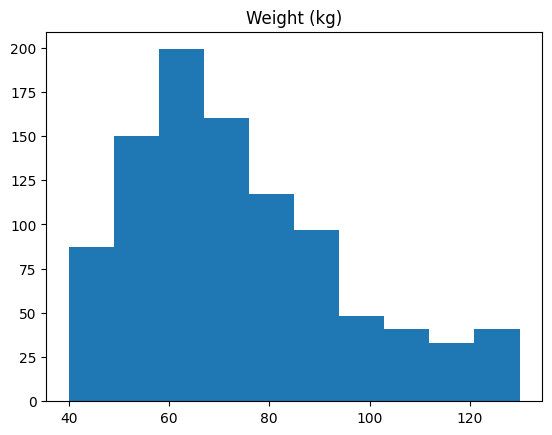


Mean value for Height (m) : 1.723
Median value for Height (m) : 1.71
Standard deviation for Height (m) : 0.128


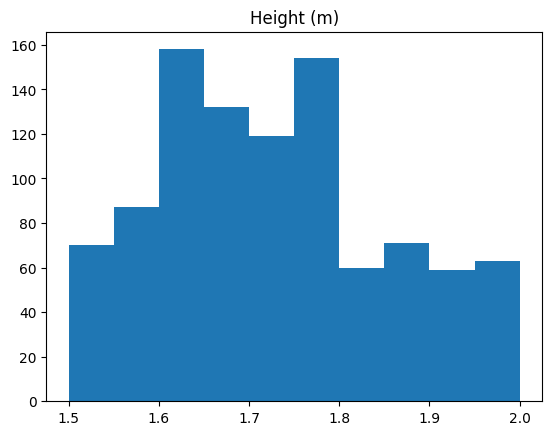


Mean value for Max_BPM : 179.884
Median value for Max_BPM : 180.0
Standard deviation for Max_BPM : 11.52


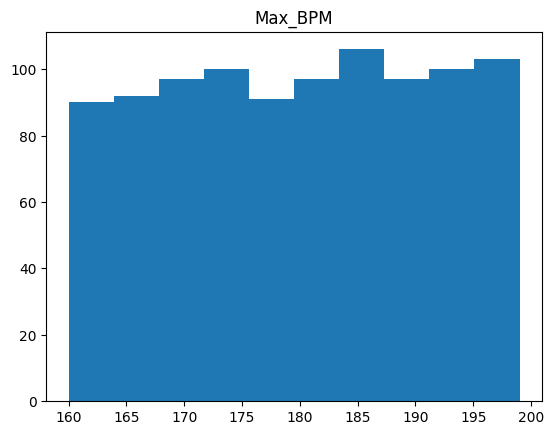


Mean value for Avg_BPM : 143.767
Median value for Avg_BPM : 143.0
Standard deviation for Avg_BPM : 14.338


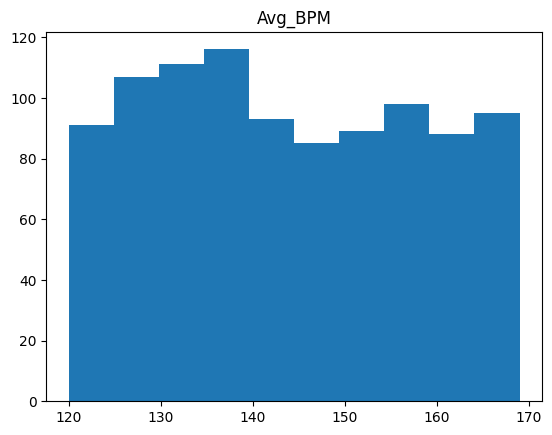


Mean value for Resting_BPM : 62.223
Median value for Resting_BPM : 62.0
Standard deviation for Resting_BPM : 7.323


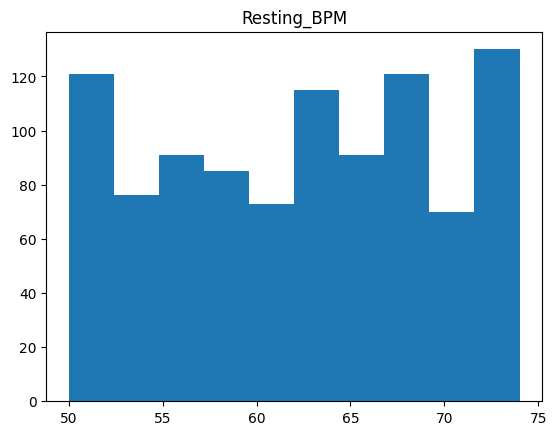


Mean value for Session_Duration (hours) : 1.256
Median value for Session_Duration (hours) : 1.26
Standard deviation for Session_Duration (hours) : 0.343


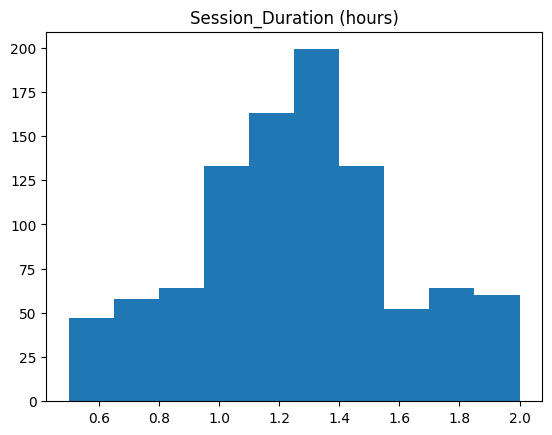


Mean value for Calories_Burned : 905.422
Median value for Calories_Burned : 893.0
Standard deviation for Calories_Burned : 272.501


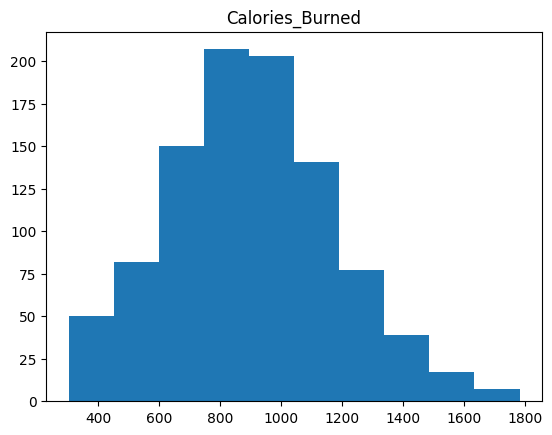


Mode value for Workout_Type : Cardio

Mean value for Fat_Percentage : 24.977
Median value for Fat_Percentage : 26.2
Standard deviation for Fat_Percentage : 6.256


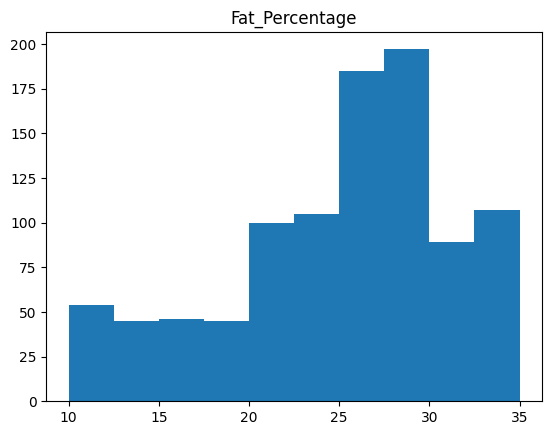


Mean value for Water_Intake (liters) : 2.627
Median value for Water_Intake (liters) : 2.6
Standard deviation for Water_Intake (liters) : 0.6


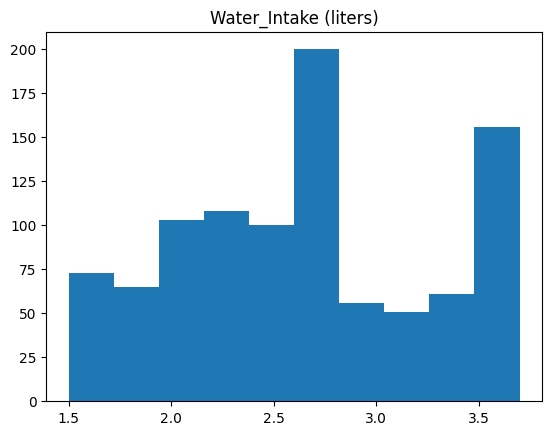


Mean value for Workout_Frequency (days/week) : 3.322
Median value for Workout_Frequency (days/week) : 3.0
Standard deviation for Workout_Frequency (days/week) : 0.913


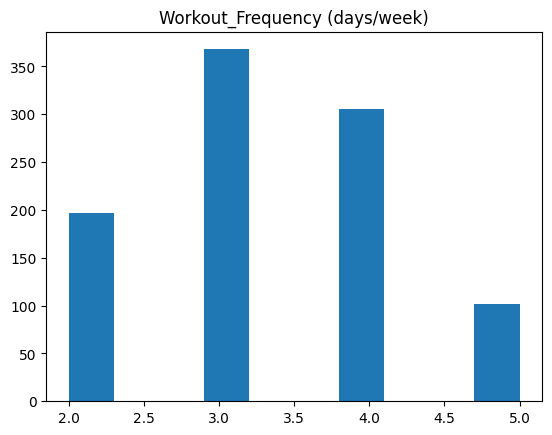


Mean value for Experience_Level : 1.81
Median value for Experience_Level : 2.0
Standard deviation for Experience_Level : 0.739


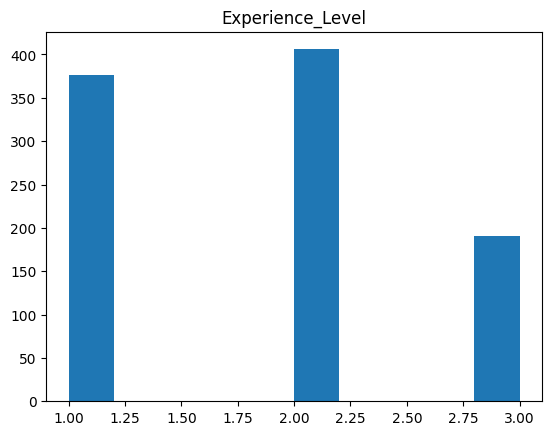


Mean value for BMI : 24.912
Median value for BMI : 24.16
Standard deviation for BMI : 6.657


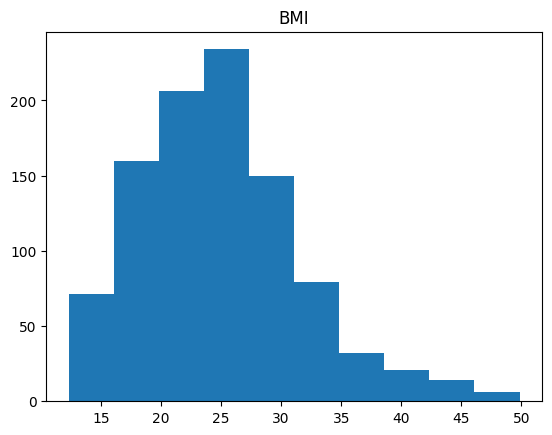

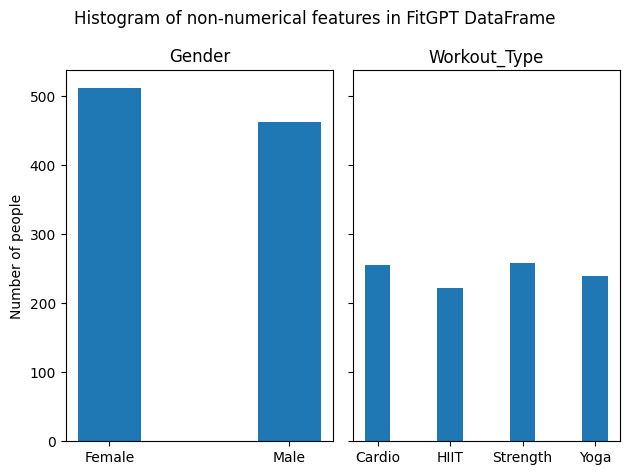

In [9]:
for label, data in fitgpt_df.items():
    if data.dtypes != 'object':
        print(f'Mean value for {label} : {np.round(np.mean(data), 3)}')
        print(f'Median value for {label} : {np.round(np.median(data), 3)}')
        print(f'Standard deviation for {label} : {np.round(np.std(data), 3)}')

        plt.title(f'{label}')
        plt.hist(data, bins=10)
        plt.show()
    else:
        _, counts = np.unique(data, return_counts=True)
        index_of_most_freq = np.argmax(counts)
        print(f'Mode value for {label} : {data[index_of_most_freq]}')

    print()
 
# Categorical features bar plot evaluation
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle("Histogram of non-numerical features in FitGPT DataFrame")
ax1.set_title("Gender")
ax1.set_ylabel("Number of people")
gender_types = np.unique(fitgpt_df['Gender'].values)
male_count = len(fitgpt_df.loc[fitgpt_df['Gender'] == 'Male'])
female_count = len(fitgpt_df.loc[fitgpt_df['Gender'] == 'Female'])
ax1.bar(gender_types, [male_count, female_count] , width=0.35)

ax2.set_title("Workout_Type")
workout_types = np.unique(fitgpt_df['Workout_Type'].values)
number_trainees = []
for workout in workout_types:
    number_trainees.append(len(fitgpt_df[fitgpt_df['Workout_Type'] == workout]))
ax2.bar(workout_types, number_trainees , width=0.35)

plt.tight_layout()
plt.show()

As a result of the researched features one by one, we cannot notice any abnormalities in the clients for any of the characteristics (nothing like a predominance of overweight people or people with heart problems). The balance between the workout types and gender is a good sign, because that way the information will not be distorted.

As a next step of exploration of the data, we can check if missing values for some of the features are existing. By identifying them we can prevent wrongly evaluated data in the end.

In [10]:
missing_values = fitgpt_df.isna().mean().sort_values(ascending=False)
print(missing_values)

Age                              0.0
Gender                           0.0
Weight (kg)                      0.0
Height (m)                       0.0
Max_BPM                          0.0
Avg_BPM                          0.0
Resting_BPM                      0.0
Session_Duration (hours)         0.0
Calories_Burned                  0.0
Workout_Type                     0.0
Fat_Percentage                   0.0
Water_Intake (liters)            0.0
Workout_Frequency (days/week)    0.0
Experience_Level                 0.0
BMI                              0.0
dtype: float64


Since no data is missing, we shouldn't use any of the techniques for dealing with missing data which, in case of happening, are:

Removing rows from columns where the missing values are < 5%.
Removing columns where the missing data is > 65%.
Imputing missing values with the best value.
Default strategy for imputing - mean. Other strategies - median, most_frequent, constant.

Analysing the extremal values should be done, thus preventing wrong models. First will describe the data and using boxplot, we will analyse the existance of extremal data.

                               count        mean         std     min     25%  \
Age                            973.0   38.683453   12.180928   18.00   28.00   
Weight (kg)                    973.0   73.854676   21.207500   40.00   58.10   
Height (m)                     973.0    1.722580    0.127720    1.50    1.62   
Max_BPM                        973.0  179.883864   11.525686  160.00  170.00   
Avg_BPM                        973.0  143.766701   14.345101  120.00  131.00   
Resting_BPM                    973.0   62.223022    7.327060   50.00   56.00   
Session_Duration (hours)       973.0    1.256423    0.343033    0.50    1.04   
Calories_Burned                973.0  905.422405  272.641516  303.00  720.00   
Fat_Percentage                 973.0   24.976773    6.259419   10.00   21.30   
Water_Intake (liters)          973.0    2.626619    0.600172    1.50    2.20   
Workout_Frequency (days/week)  973.0    3.321686    0.913047    2.00    3.00   
Experience_Level               973.0    

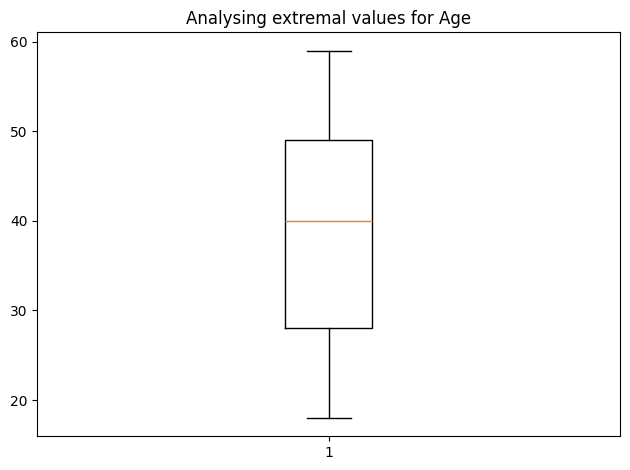

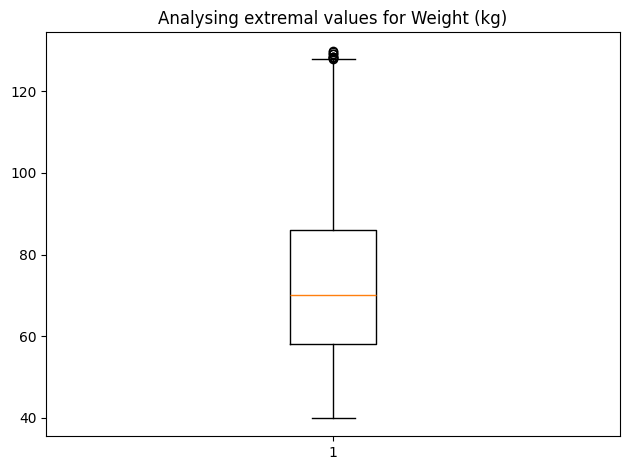

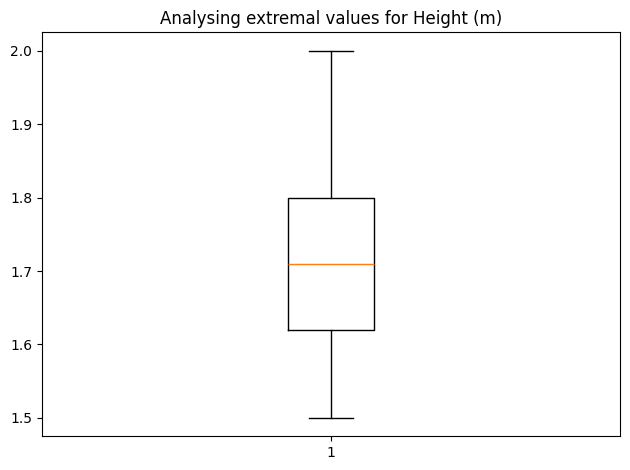

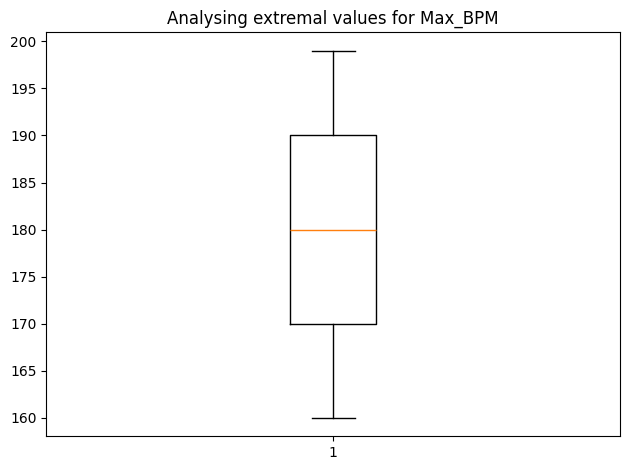

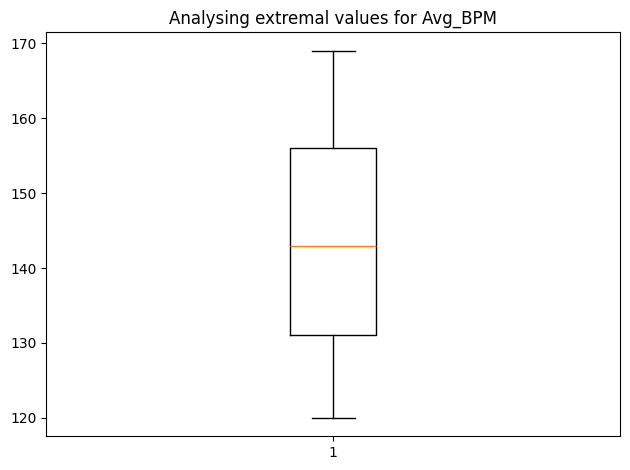

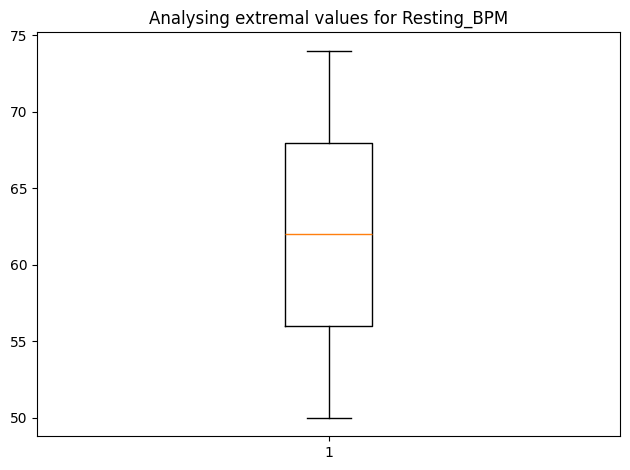

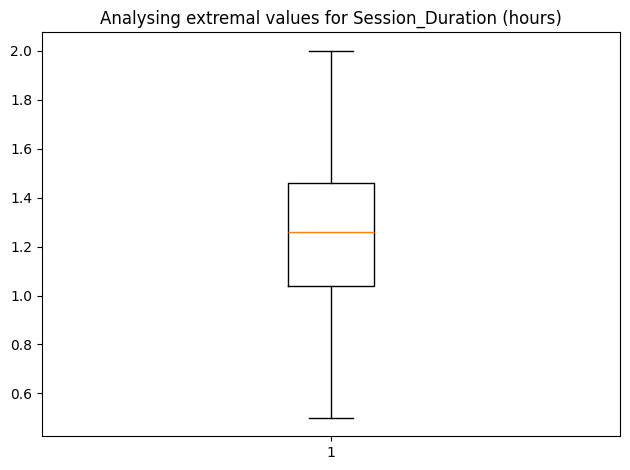

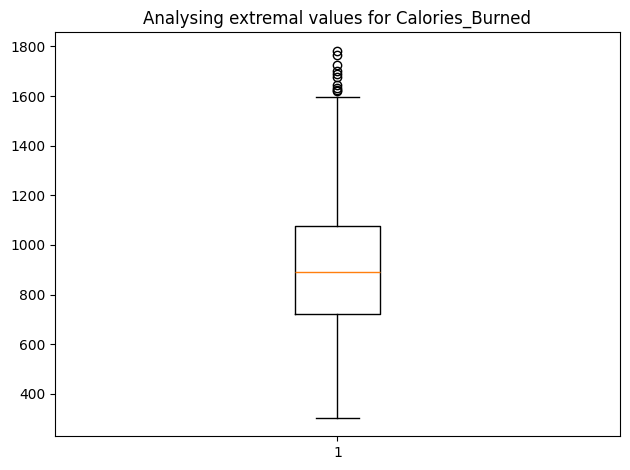

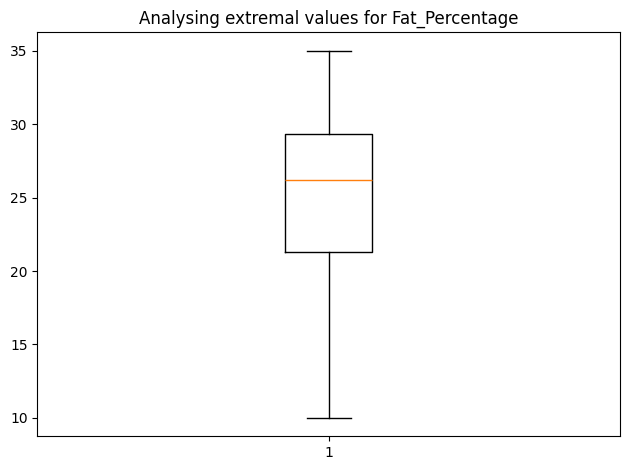

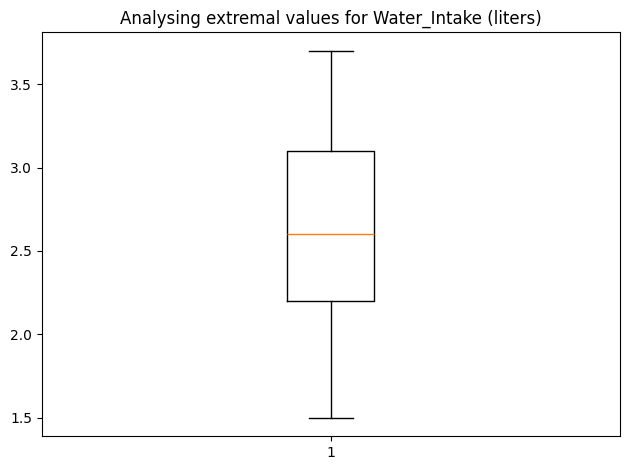

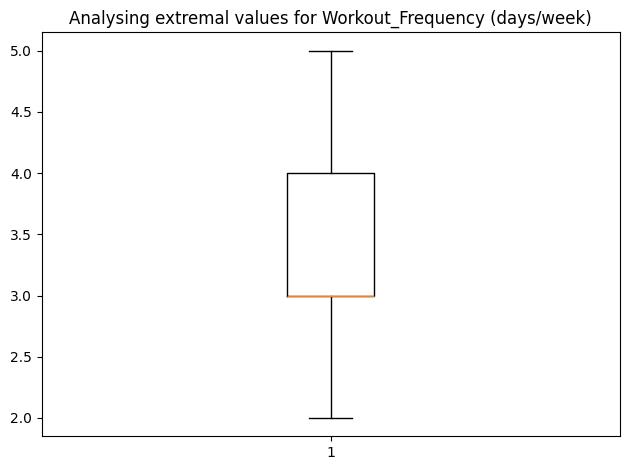

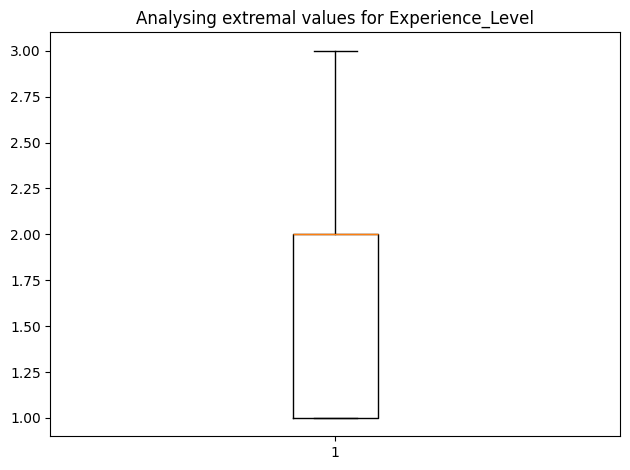

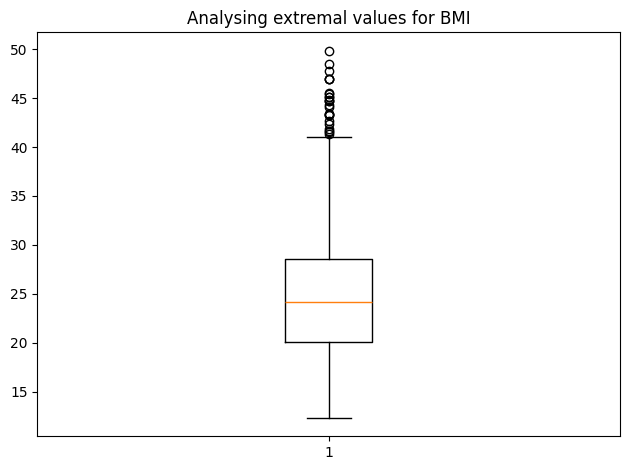

In [11]:
print(fitgpt_df.describe().T)

fitgpt_df = fitgpt_df.drop(['Gender', 'Workout_Type'], axis=1)

for label, data in fitgpt_df.items():
    plt.title(f'Analysing extremal values for {label}')
    plt.boxplot(data)
    plt.tight_layout()
    plt.show()

Anlysing the result, we can spot that extremal vlaues exist for Weigth, Calories burned and BMI. When applying the models, data can be scaled, using StandardScaler. Data can be normalized or standardized.

                                            Dependency analysis

After exploring the statistical characteristics of each feature, we can search for dependencies between labels and how they can be used in the model evaluation later.
First of all, a correlation heatmap can be prepared:

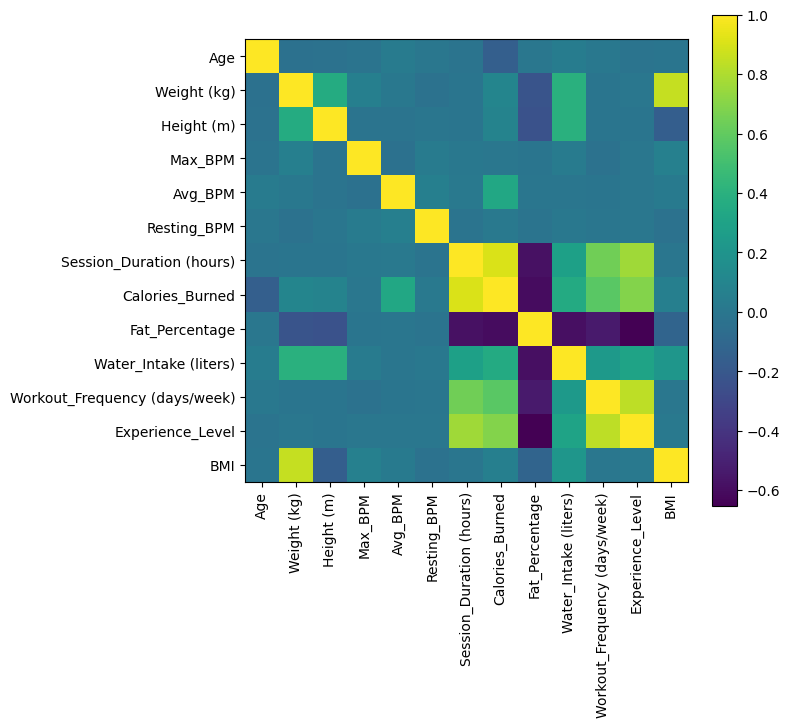

In [14]:
fitgpt_df = fitgpt_df.drop(['Gender', 'Workout_Type'], axis=1)

fit_corr=fitgpt_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(fit_corr, interpolation='nearest')

fig.colorbar(im, orientation='vertical', fraction = 0.05)
ax.set_xticks(range(0,13))
ax.set_xticklabels(fitgpt_df.columns, rotation='vertical')
ax.set_yticks(range(0,13), fitgpt_df.columns)

plt.tight_layout()
plt.show()

Dependencies:

Weight - BMI ; 
Workout frequency - Experience level <br> 
Workout frequency - Calories burned <br> 
Workout frequency - Session duration <br> 
Fat percentage - Water intake etc.

Now by visualizing the dependencies, we spot other interesting dependencies which are useful:

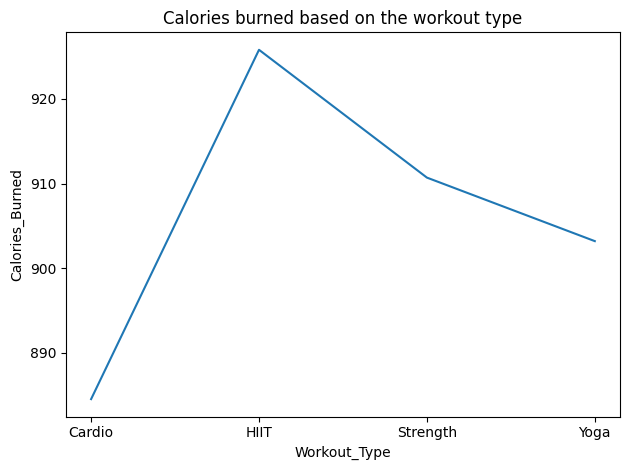

In [17]:
plt.title("Calories burned based on the workout type")
workout_types = np.unique(fitgpt_df['Workout_Type'].values)
mean_calories_per_type = {}
for workout in workout_types:
    mean_calories_per_type[workout] = np.mean(fitgpt_df[fitgpt_df['Workout_Type'] == workout]['Calories_Burned'])

plt.xlabel("Workout_Type")
plt.ylabel("Calories_Burned")
plt.plot(workout_types, mean_calories_per_type.values())
plt.tight_layout()
plt.show()

The HIIT workout burns the most calories, and interestingly, the Strength ones burn more calories than the Cardio.

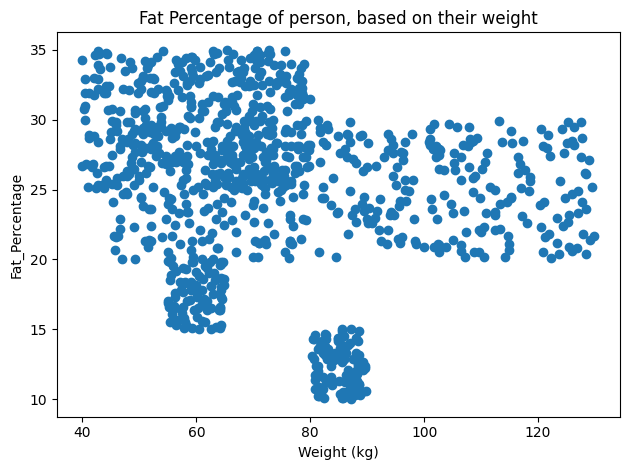

In [18]:
plt.title("Fat Percentage of person, based on their weight")
plt.scatter(fitgpt_df['Weight (kg)'], fitgpt_df['Fat_Percentage'])
plt.xlabel('Weight (kg)')
plt.ylabel('Fat_Percentage')
plt.tight_layout()
plt.show()

People weighting 55-65 kg and 80-90kg are who has lowest fat percentage - needs further analysing.

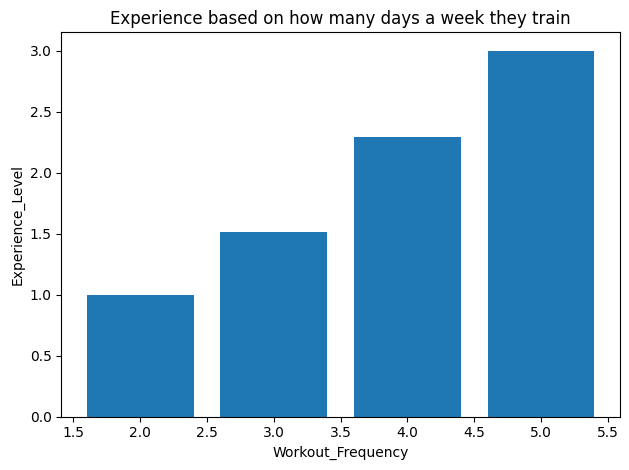

In [19]:
plt.title("Experience based on how many days a week they train")
num_days = np.arange(1, 7)
experience = {}
for days in num_days:
    experience[days] = np.mean(fitgpt_df[fitgpt_df['Workout_Frequency (days/week)'] == days]['Experience_Level'])
plt.bar(num_days, experience.values())
plt.xlabel('Workout_Frequency')
plt.ylabel('Experience_Level')
plt.tight_layout()
plt.show()

The more you train, the more experrience you gain.

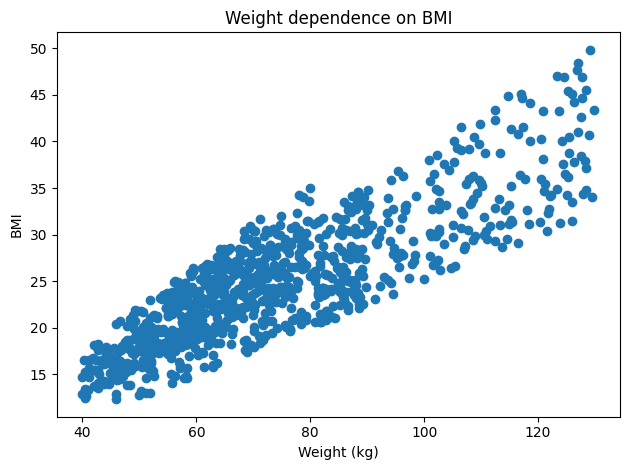

In [20]:
plt.title("Weight dependence on BMI")
plt.scatter(fitgpt_df['Weight (kg)'], fitgpt_df['BMI'])
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

There is a linear dependence between the Weight and the BMI, which is pretty much obvious, because BMI is a combination of weight and heigth.

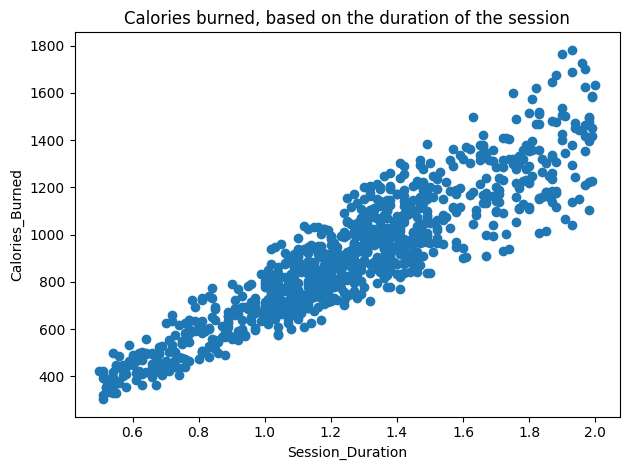

In [21]:
plt.title("Calories burned, based on the duration of the session")
plt.scatter(fitgpt_df['Session_Duration (hours)'], fitgpt_df['Calories_Burned'])
plt.xlabel('Session_Duration')
plt.ylabel('Calories_Burned')
plt.tight_layout()
plt.show()

If you train more hours, you burn more calories, no matter what is the type of the workout.

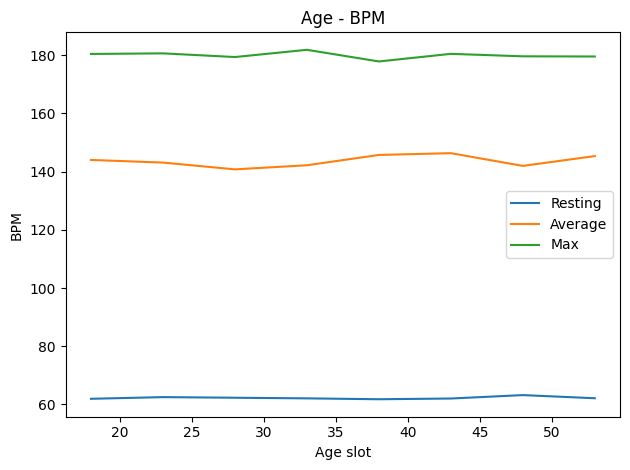

In [22]:
plt.title("Age - BPM")
min_age = np.min(fitgpt_df['Age'])
max_age = np.max(fitgpt_df['Age'])
resting_bpm = {}
avg_bpm = {}
max_bpm = {}

for age in range(min_age, max_age-5, 5):
    resting_bpm[age] = np.mean(fitgpt_df.loc[fitgpt_df['Age'].between(age, age + 5)]['Resting_BPM'])
    avg_bpm[age] = np.mean(fitgpt_df.loc[fitgpt_df['Age'].between(age, age + 5)]['Avg_BPM'])
    max_bpm[age] = np.mean(fitgpt_df.loc[fitgpt_df['Age'].between(age, age + 5)]['Max_BPM'])

plt.plot(resting_bpm.keys(), resting_bpm.values())
plt.plot(avg_bpm.keys(), avg_bpm.values())
plt.plot(max_bpm.keys(), max_bpm.values())
plt.xlabel('Age slot')
plt.ylabel('BPM')
plt.legend(['Resting', 'Average', 'Max'])
plt.tight_layout()
plt.show()

Here we can spot that the BPM level is not changing that much, no matter what age the client is. This is good, high intensity workouts won't be a problem for older people.

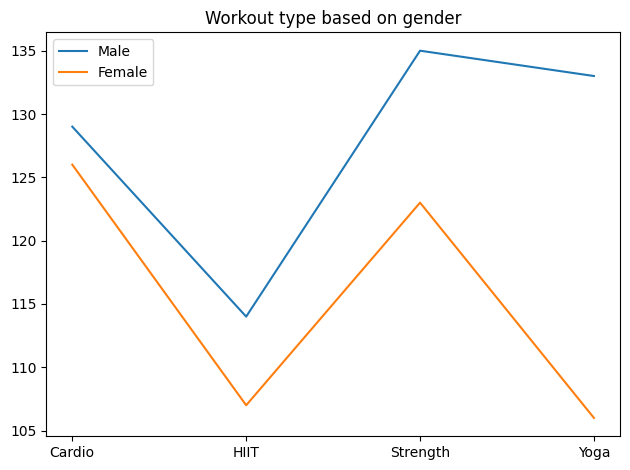

In [23]:
plt.title('Workout type based on gender')
workout_types = np.unique(fitgpt_df['Workout_Type'].values)

workout_by_gender = {}
for workout in workout_types:
    male_choice_cnt = len(fitgpt_df.loc[(fitgpt_df['Workout_Type'] == workout) & (fitgpt_df['Gender'] == 'Male')])
    female_choice_cnt = len(fitgpt_df.loc[(fitgpt_df['Workout_Type'] == workout) & (fitgpt_df['Gender'] == 'Female')])
    workout_by_gender[workout] = [male_choice_cnt, female_choice_cnt]

plt.plot(workout_types, workout_by_gender.values())
plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.show()

Taking into account that more males are visiting this gym, it is normal to have more visiting each of the workout types. It is strange that the Yoga is so visited by males.

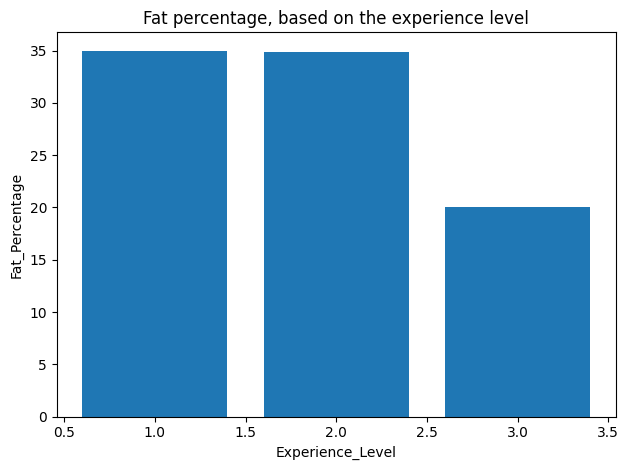

In [24]:
plt.title("Fat percentage, based on the experience level")
plt.bar(fitgpt_df['Experience_Level'], fitgpt_df['Fat_Percentage'])
plt.xlabel('Experience_Level')
plt.ylabel('Fat_Percentage')
plt.tight_layout()
plt.show()

If you are first of second level of experience - the fat percentage is not such a big factor. However, very experienced trainees have low fat percentage for sure.

                                                        Modeling Data

After looking at numerous graphics it is time to choose attributes for best predicting the callories burned by client as well as using the best model with best parameters.

Attributes choosing: <br>
X = Age, Gender, BMI, Session duration, Water intake <br>
y = Calories burned

KNN:

Score based on the number of neighbours: {np.int64(1): 0.0051, np.int64(2): 0.0051, np.int64(3): 0.0051, np.int64(4): 0.0051, np.int64(5): 0.0051, np.int64(6): 0.0051, np.int64(7): 0.0051, np.int64(8): 0.0051, np.int64(9): 0.0, np.int64(10): 0.0, np.int64(11): 0.0, np.int64(12): 0.0}


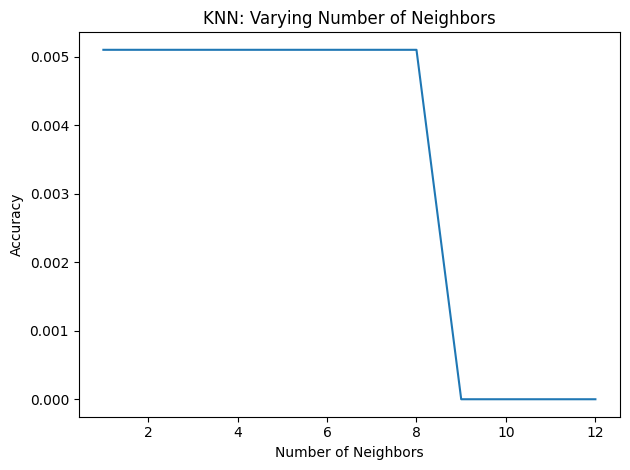

In [30]:
fitgpt_dummies = pd.get_dummies(fitgpt_df['Gender'], drop_first=True, dtype=int)
fitgpt_dummies = pd.concat([fitgpt_df, fitgpt_dummies], axis=1)
fitgpt_dummies = fitgpt_dummies.drop(columns=['Gender'])


X = fitgpt_dummies[['Age', 'BMI', 'Session_Duration (hours)', 'Water_Intake (liters)', 'Male']]
y = fitgpt_dummies['Calories_Burned'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_accuracies = {}

neighbours = np.arange(1, 13)
for n_neighbours_cnt in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n_neighbours_cnt)
    knn.fit(X_train, y_train)

    test_accuracies[n_neighbours_cnt] = round(knn.score(X_test, y_test), 4)

print(f'Score based on the number of neighbours: {test_accuracies}')
plt.plot(test_accuracies.keys(), test_accuracies.values())

plt.title('KNN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

We can conclude dhat no matter how many neighbours we are using, the accuracy is low.

In [32]:
fitgpt_dummies = pd.get_dummies(fitgpt_df['Gender'], drop_first=True, dtype=int)
fitgpt_dummies = pd.concat([fitgpt_df, fitgpt_dummies], axis=1)
fitgpt_dummies = fitgpt_dummies.drop(columns=['Gender'])


X = fitgpt_dummies[['Age', 'BMI', 'Session_Duration (hours)', 'Water_Intake (liters)', 'Male']]
y = fitgpt_dummies['Calories_Burned'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_regression = LinearRegression()
lin_regression.fit(X_train, y_train)
predictions_score = lin_regression.score(X_test, y_test)

print(f'Linear regression score: {predictions_score}')

Linear regression score: 0.8784099771219276


This score is very good, we can try by using Pipeline and also using GridSearchCV to choose the best parameters.

In [ ]:
fitgpt_dummies = pd.get_dummies(fitgpt_df['Gender'], drop_first=True, dtype=int)
fitgpt_dummies = pd.concat([fitgpt_df, fitgpt_dummies], axis=1)
fitgpt_dummies = fitgpt_dummies.drop(columns=['Gender'])

X = fitgpt_dummies[['Age', 'BMI', 'Session_Duration (hours)', 'Water_Intake (liters)', 'Male']]
fitgpt_dummies['Calories_Burned'] = np.where(fitgpt_dummies['Calories_Burned'] >= 800 , 1, 0)
y = fitgpt_dummies['Calories_Burned'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'logreg__solver' : ['newton-cg', 'saga', 'lbfgs'],
    'logreg__C' : np.linspace(0.001, 1.0, 10)
}

steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=42))]
pipeline = Pipeline(steps)
logreg = GridSearchCV(pipeline, param_grid).fit(X_train, y_train)
logreg_score = logreg.score(X_test, y_test)

print(f'Tuned Logistic Regression Parameters: {logreg.best_params_}')
print(f'Accuracy: {logreg_score}')

Tuned Logistic Regression Parameters: {'logreg__C': np.float64(0.445), 'logreg__solver': 'newton-cg'}
Accuracy: 0.8974358974358975


Here, by tuning the parrameters for Logistic Regression, we can see that the accuracy is 0.89 which is much closer to 1.0.

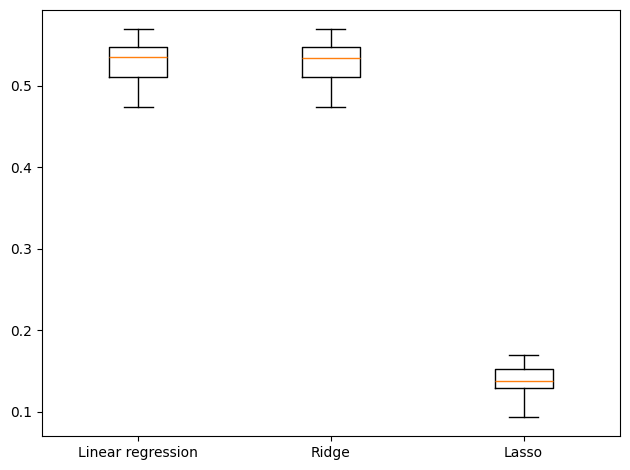

In [48]:
fitgpt_dummies = pd.get_dummies(fitgpt_df['Gender'], drop_first=True, dtype=int)
fitgpt_dummies = pd.concat([fitgpt_df, fitgpt_dummies], axis=1)
fitgpt_dummies = fitgpt_dummies.drop(columns=['Gender'])

X = fitgpt_dummies[['Age', 'BMI', 'Session_Duration (hours)', 'Water_Intake (liters)', 'Male']]
fitgpt_dummies['Calories_Burned'] = np.where(fitgpt_dummies['Calories_Burned'] >= 800 , 1, 0)
y = fitgpt_dummies['Calories_Burned'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

kf = KFold(n_splits=6, shuffle=True, random_state=42)

linear_reg = LinearRegression()
lin_reg_score = cross_val_score(linear_reg, X_train, y_train, cv=kf)
lasso_reg = Lasso(alpha=0.1)
lasso_reg_score = cross_val_score(lasso_reg, X_train, y_train, cv=kf)    
ridge_reg = Ridge(alpha=0.1)
ridge_reg_score = cross_val_score(ridge_reg, X_train, y_train, cv=kf)

plt.boxplot([lin_reg_score, ridge_reg_score, lasso_reg_score], tick_labels=['Linear regression', 'Ridge', 'Lasso'])
plt.tight_layout()
plt.show()

Here the score is not very satisfactory, especially for Lasso regression.

Lets divide the workout types and based on different types, to conclude whether a trainee will burn 800 cals.

In [65]:
fitgpt_dummies = pd.get_dummies(fitgpt_df['Workout_Type'], drop_first=True, dtype=int)
fitgpt_dummies = pd.concat([fitgpt_df, fitgpt_dummies], axis=1)
fitgpt_dummies = fitgpt_dummies.drop(columns=['Workout_Type'])

X = fitgpt_dummies[['Age', 'BMI', 'Session_Duration (hours)', 'Water_Intake (liters)', 'HIIT']]
fitgpt_dummies['Calories_Burned'] = np.where(fitgpt_dummies['Calories_Burned'] >= 800 , 1, 0)
y = fitgpt_dummies['Calories_Burned'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'logreg__solver' : ['newton-cg', 'saga', 'lbfgs'],
    'logreg__C' : np.linspace(0.001, 1.0, 10)
}

steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=42))]
pipeline = Pipeline(steps)
logreg = GridSearchCV(pipeline, param_grid).fit(X_train, y_train)
logreg_score = logreg.score(X_test, y_test)

print(f'Score for workout: {logreg_score}')

Score for workout: 0.9025641025641026


As a result of the performed tests, we can conclude that the best model which we can use for this evaluation is Logistic Regression. With further investigation, better result can be received.